In [1]:

#pip install netCDF4

In [2]:
#conda install -c conda-forge cartopy

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp
import netCDF4
import cartopy.crs as ccrs
import os

# Preparing Data

In [30]:
file_path = 'Tropics_tp&cape_5*5.nc'
file_path2 = 'TropicsOcean1.nc'  

#Opening dataset for land                                  
dsT = xr.open_dataset(file_path)

#Opening dataset for ocean 
dsM = xr.open_dataset(file_path2)

#Averaging to get daily data for land 
daily_meanT = dsT.resample(time='D').mean(dim='time')
#Averaging to get daily data for midlatitudes
daily_meanM = dsM.resample(time='D').mean(dim='time')

#Averging daily data across lat and lon for ocean 
avg_dsMT = daily_meanT.mean(dim=['latitude', 'longitude'])  
#Averging daily data across lat and lon for midlatitudes
avg_dsMM = daily_meanM.mean(dim=['latitude', 'longitude'])  

# Dataset Map Visualization

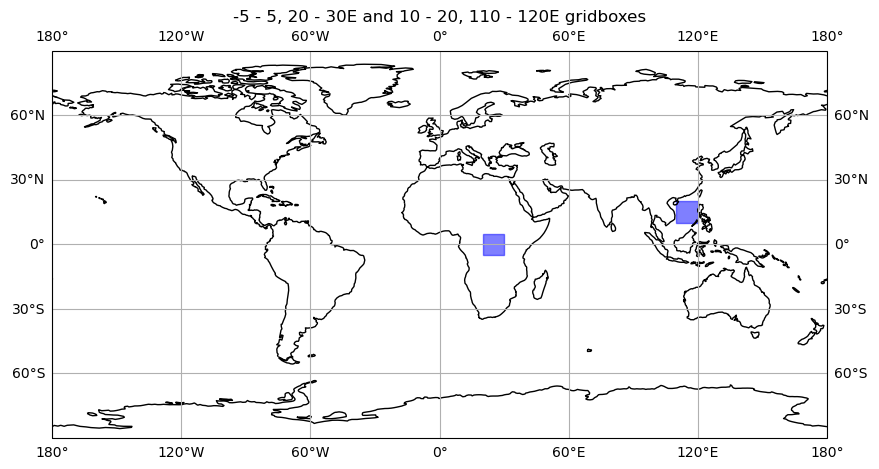

In [6]:
#Visualising the regions of the dataset 

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

# Defining coordinates to plot
ax.fill([20, 30, 30, 20, 20], [5, 5, -5, -5, 5], transform=ccrs.PlateCarree(), color='blue', alpha=0.5)
ax.fill([110, 120, 120, 110, 110], [10, 10, 20, 20, 10], transform=ccrs.PlateCarree(), color='blue', alpha=0.5)

# Displaying the plot
plt.title('-5 - 5, 20 - 30E and 10 - 20, 110 - 120E gridboxes')
ax.gridlines(draw_labels=True)
plt.show()

In [7]:
#Averaging 6 hourly across lat and lon for the land
avg_dsT = dsT.mean(dim=['latitude', 'longitude'])  

#Averaging 6 hourly across lat and lon for the ocean                  
avg_dsM = dsM.mean(dim=['latitude', 'longitude']) 
  

# Scatterplots Creation

## Objective

The objective of this section is to visually explore the relationship between Convective Available Potential Energy (CAPE) and precipitation. Two separate scatterplots will be created, one for ocean regions and one for land regions. The aim is to observe if there is any positive correlation between CAPE and precipitation in these distinct environments.

## Scatterplot for land

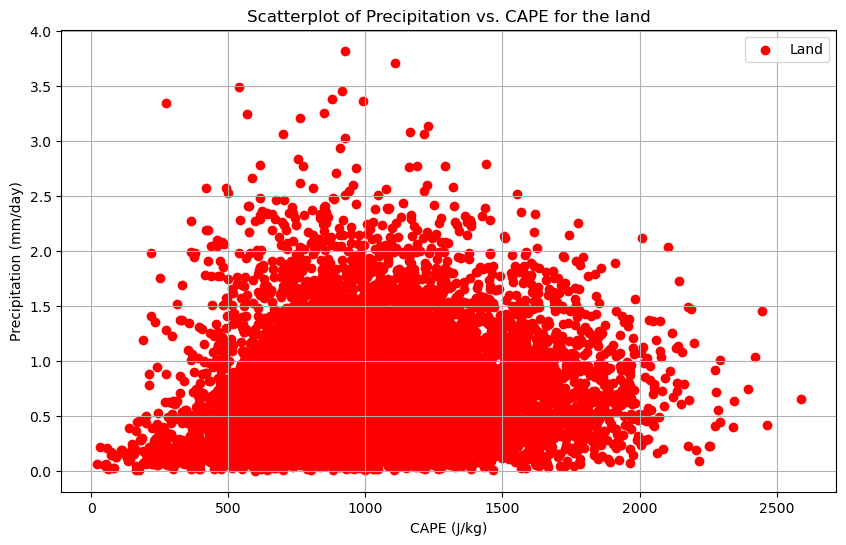

In [21]:
#Create scatterplot of precipitation vs cape

plt.figure(figsize=(10, 6))                

plt.scatter(avg_dsMT['cape'], (avg_dsMT['tp']*4000), alpha=1, c='red', label='Land')

plt.xlabel('CAPE (J/kg)')
plt.ylabel('Precipitation (mm/day)')
plt.title('Scatterplot of Precipitation vs. CAPE for the land')



plt.legend()
plt.grid(True)
plt.show()

## Scatterplot for the ocean

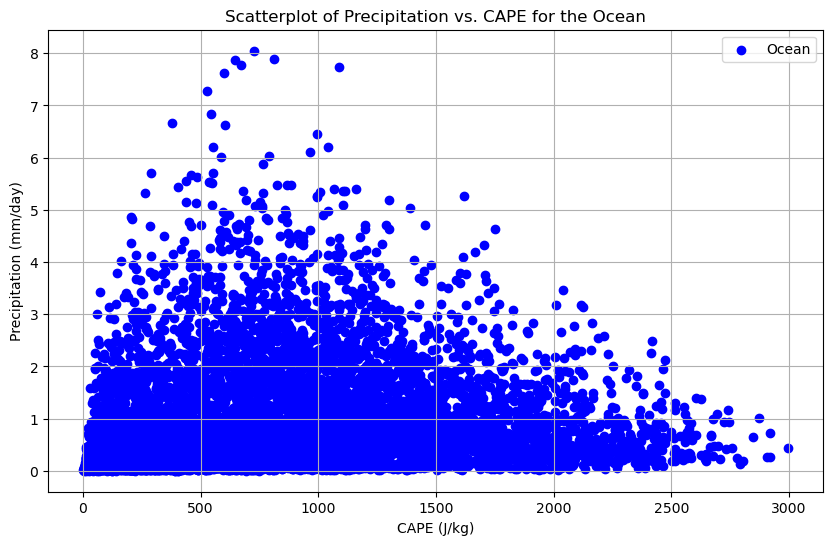

In [26]:
#Create scatterplot of precipitation vs cape

plt.figure(figsize=(10, 6))                

plt.scatter(avg_dsMM['cape'], (avg_dsMM['tp']*4000), alpha=1, c='blue', label='Ocean')

plt.xlabel('CAPE (J/kg)')
plt.ylabel('Precipitation (mm/day)')
plt.title('Scatterplot of Precipitation vs. CAPE for the Ocean')



plt.legend()
plt.grid(True)
plt.show()

## Scatterplots Examination

Initially, I created scatterplots to explore the relationship between CAPE and precipitation. However, the visual examination of these plots did not provide sufficient concrete evidence to establish a clear positive correlation between CAPE and precipitation.

# Binning CAPE and Averaging Precipitation

In this section, I further explore the relationship between Convective Available Potential Energy (CAPE) and precipitation by binning CAPE values and calculating the average precipitation within each bin.


In [23]:
#Looping for binning the cape into 15 different bins and averaging precipitation in those bins to understand the relation between precipitation and cape

cape_bins = np.linspace(0, 2500, 17)
tps = []
for data in (avg_dsMT, avg_dsMM):
    positive_precip = data['tp'].where((data['tp']*24000) > 1.0)
    cape_positive_precip = data['cape'].where((data['tp']*24000) > 1.0)
    binned_precipitation = positive_precip.groupby_bins(cape_positive_precip, bins=cape_bins)
    avgtp = binned_precipitation.mean()
    cape_mid = (cape_bins[1:] + cape_bins[:-1])/2
    tps.append(avgtp)

## Plot for land

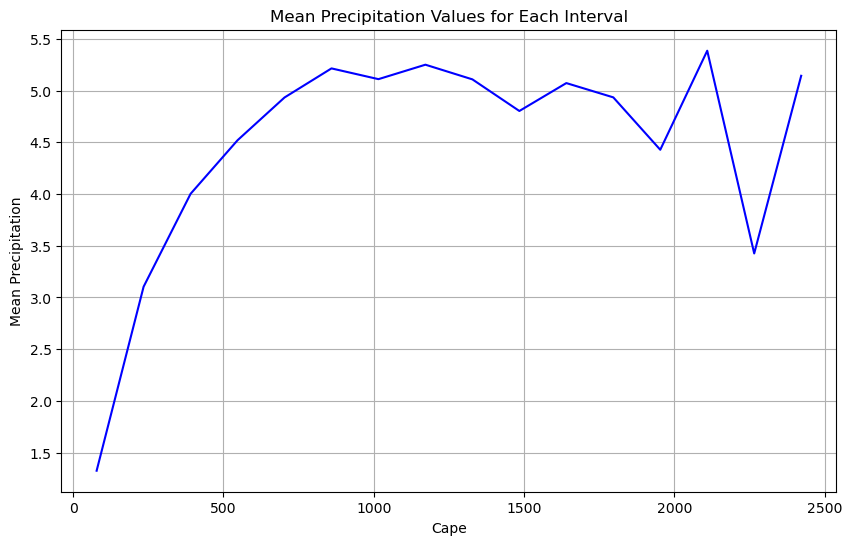

In [31]:
#Plotting for Land

plt.figure(figsize=(10, 6))
plt.plot(cape_mid, tps[0]*24000,color = 'b')
plt.xlabel('Cape')
plt.ylabel('Mean Precipitation')
plt.title('Mean Precipitation Values for Each Interval')
plt.grid(True)


## Plot for the ocean


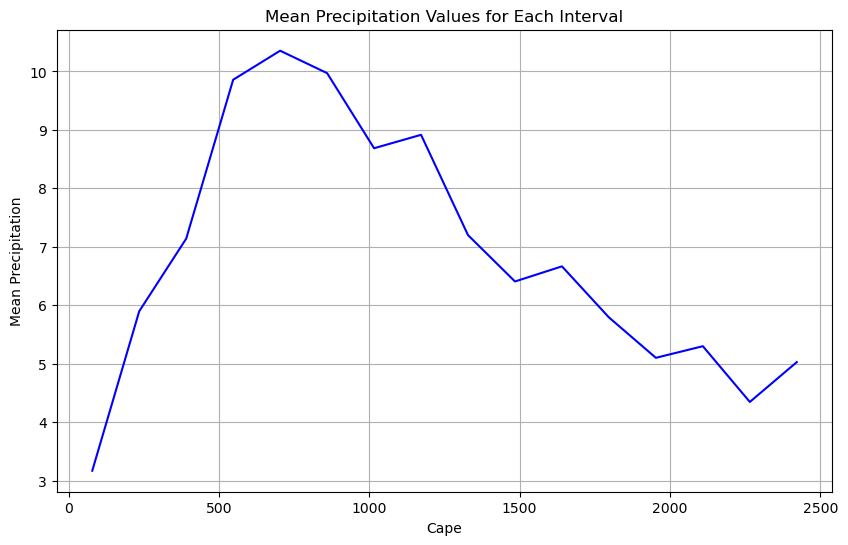

In [32]:
#Plotting for Ocean

plt.figure(figsize=(10, 6))
plt.plot(cape_mid, tps[1]*24000,color = 'b')
plt.xlabel('Cape')
plt.ylabel('Mean Precipitation')
plt.title('Mean Precipitation Values for Each Interval')
plt.grid(True)

# Binned Plot Examination

## Over Land

The binned plot over land reveals a notable pattern in the relationship between CAPE and precipitation. Initially, there is an exponential increase in precipitation as CAPE values rise from 0 to 800. However, beyond 800 CAPE, there is a gradual decrease in precipitation with increasing CAPE. This suggests a complex and potentially non-linear relationship between CAPE and precipitation over land.

## Over the Ocean

Conversely, the binned plot over the ocean exhibits a different behavior. Similar to over land, there is an exponential increase in precipitation as CAPE values rise from 0 to 800. However, the notable observation is the abrupt and steep decrease in precipitation when CAPE values exceed 800. This sharp decline in precipitation with higher CAPE values may indicate a distinct atmospheric response over ocean regions.

These observations underscore the importance of considering geographical context when analyzing the relationship between CAPE and precipitation. 